# **Reconstruccion de Color**

## Haciendo uso de Algoritmos Geneticos (AG)

-----

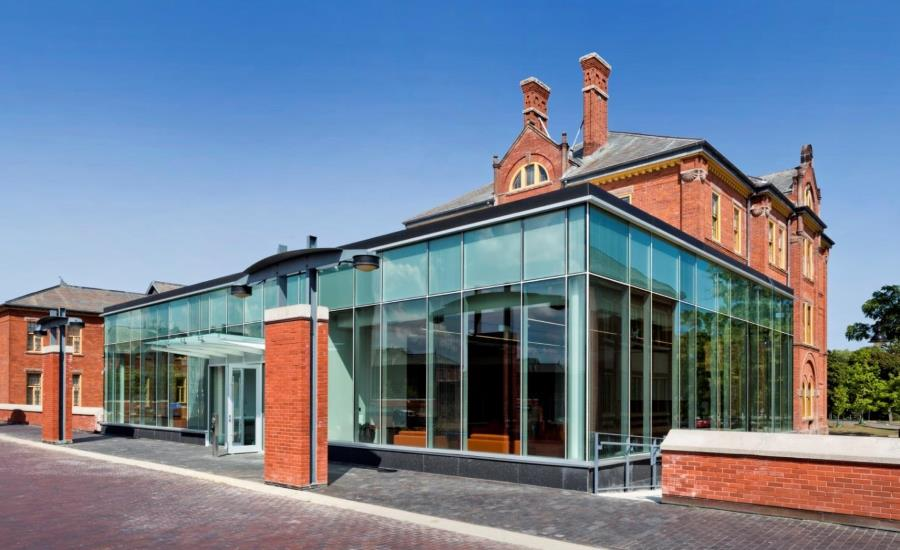

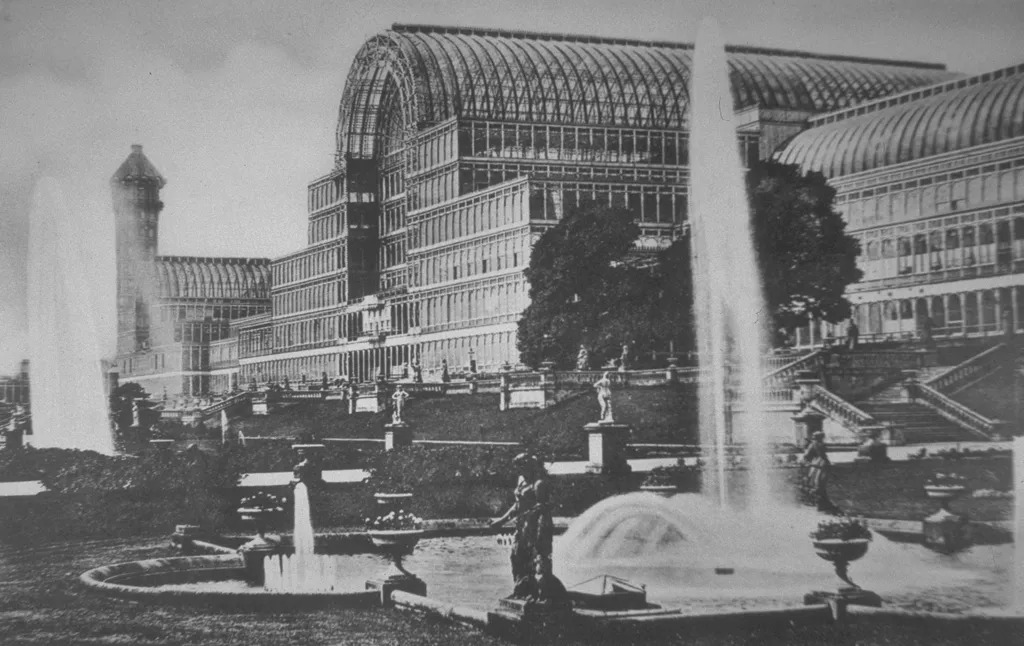

In [1]:
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# Paso 1: cargamos las imágenes y las inicializamos
image = cv2.imread('/content/B41.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Paso 2: definimos la estructura cromosómica e inicializamos la población
def initialize_population(pop_size):
    population = []
    for _ in range(pop_size):
        individual = {tuple([gray_image[x, y]]): list(image[x, y]) for x in range(image.shape[0]) for y in range(image.shape[1])}
        population.append(individual)
    return population

# Paso 3: Definimos la funcion de aptitud
def fitness(individual):
    reconstructed_image = np.zeros_like(image)
    for x in range(gray_image.shape[0]):
      for y in range(gray_image.shape[1]):
        reconstructed_image[x, y] = individual.get(tuple([gray_image[x, y]]), [0, 0, 0])
    return -mean_squared_error(image.flatten(), reconstructed_image.flatten())

# Paso 4: Definimos la funcion de cruce
def crossover(ind1, ind2):
    keys = list(ind1.keys())
    crossover_point = len(keys) // 2
    new_ind1 = {**dict(list(ind1.items())[:crossover_point]), **dict(list(ind2.items())[crossover_point:])}
    new_ind2 = {**dict(list(ind2.items())[:crossover_point]), **dict(list(ind1.items())[crossover_point:])}
    return new_ind1, new_ind2

# Paso 5: Definimos la mutacion
def mutate(individual):
    keys = list(individual.keys())
    mutation_point = random.choice(keys)
    individual[mutation_point] = [random.randint(0, 255) for _ in range(3)]

# Paso 6: La funcion principal
def genetic_algorithm(pop_size, generations):
    population = initialize_population(pop_size)

    for generation in range(generations):
        population.sort(key=fitness, reverse=True)
        new_population = []

        for i in range(0, pop_size, 2):
            ind1, ind2 = crossover(population[i], population[i+1])
            mutate(ind1)
            mutate(ind2)
            new_population.extend([ind1, ind2])

        population = new_population

    # Devuelve al mejor individuo de la última generación.
    return max(population, key=fitness)

# Probamos el algoritmo.
best_individual = genetic_algorithm(100, 20)
reconstructed_image = np.zeros_like(image)
for x in range(gray_image.shape[0]):
    for y in range(gray_image.shape[1]):
        reconstructed_image[x, y] = best_individual.get(tuple([gray_image[x, y]]), [0, 0, 0])

def apply_to_new_image(gray_image_path, best_individual, output_path):
    new_gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
    new_color_image = np.zeros((new_gray_image.shape[0], new_gray_image.shape[1], 3), dtype=np.uint8)

    for x in range(new_gray_image.shape[0]):
        for y in range(new_gray_image.shape[1]):
            new_color_image[x, y] = best_individual.get(tuple([new_gray_image[x, y]]), [0, 0, 0])

    cv2.imwrite(output_path, new_color_image)

cv2.imwrite('reconstructed_image.jpg', reconstructed_image)
apply_to_new_image('/content/B38.jpg', best_individual, 'new_colored_image.jpg')

### 10 cromosomas, 10 generaciones

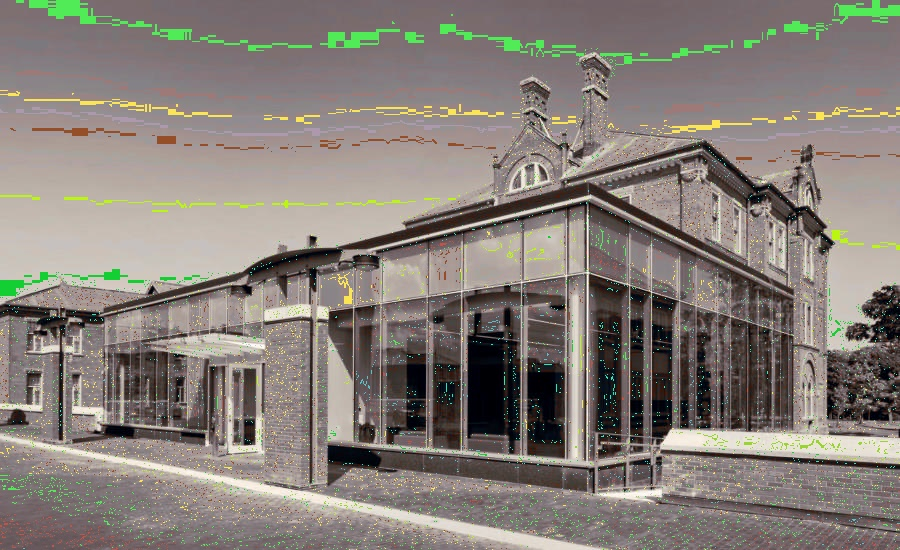

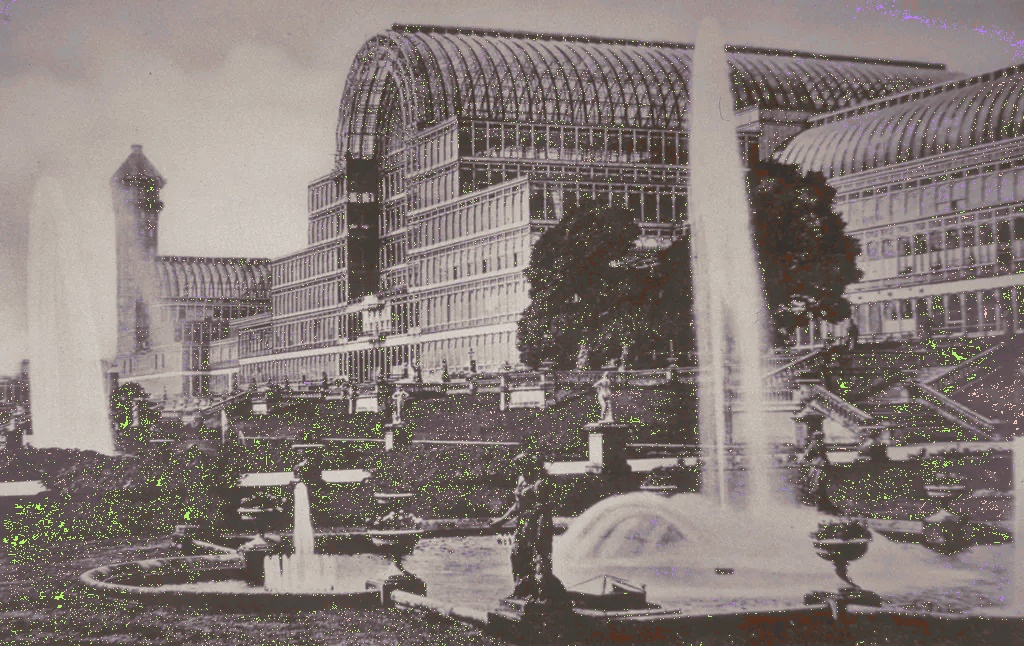

### 100 cromosomas, 20 generaciones

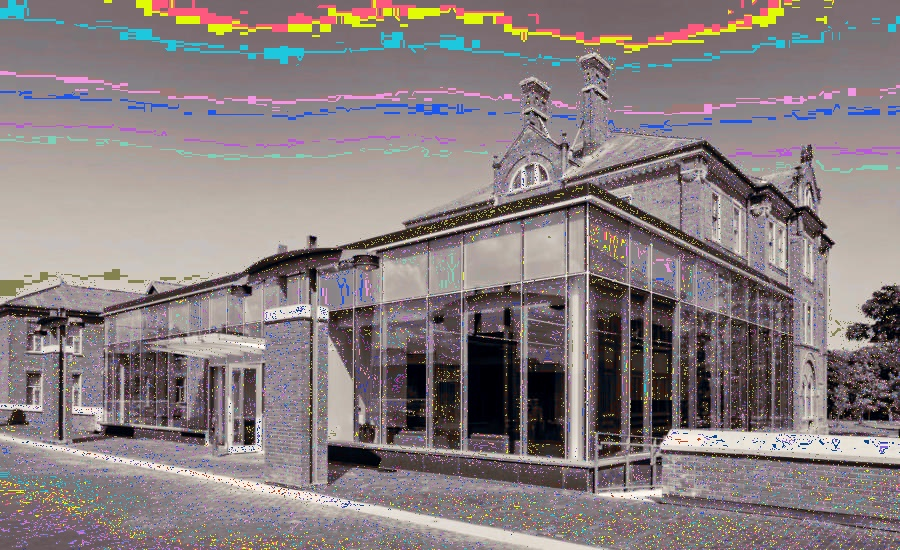

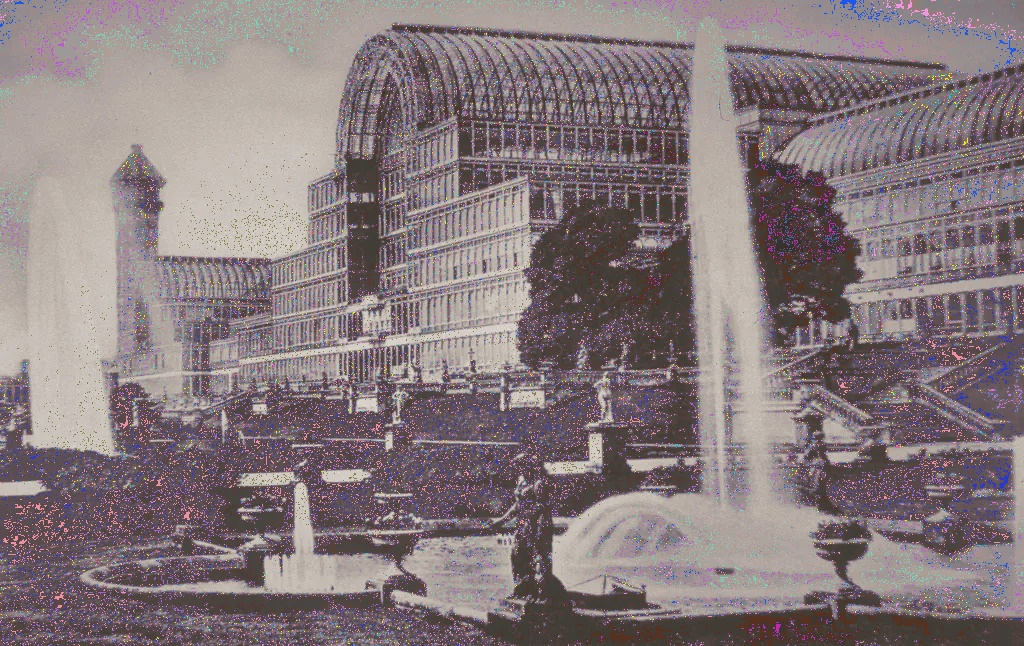